# Install packages

In [ ]:
!pip3 install ../.. --verbose --upgrade --no-cache-dir

In [3]:
import learningmachine as lm
import numpy as np

from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from time import time

In [4]:
clf_list = []

In [5]:
fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=None)
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test) 
clf_list.append((fit_obj, "ranger", fit_obj.predict_proba(X_test), score))

print(classification_report(y_test, preds.ravel().astype(int)))

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Elapsed time:  2.1012778282165527
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.97      0.91      0.94        78

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



In [6]:
fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=25)
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
score = np.mean(fit_obj.predict(X_test).ravel().astype(int) == y_test)
clf_list.append((fit_obj, "ranger_qrnn", fit_obj.predict_proba(X_test), score))

print(classification_report(y_test, preds.ravel().astype(int)))

Elapsed time:  0.28672003746032715
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.97      0.91      0.94        78

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



In [7]:
fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=0)
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
clf_list.append((fit_obj, "ranger_calibrated", fit_obj.predict_proba(X_test), score))

print(classification_report(y_test, preds.ravel().astype(int)))

Elapsed time:  0.15624117851257324
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        36
           1       0.99      0.92      0.95        78

    accuracy                           0.94       114
   macro avg       0.92      0.95      0.93       114
weighted avg       0.94      0.94      0.94       114



In [8]:
fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=25)
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
clf_list.append((fit_obj, "ranger_qrnn_calibrated", fit_obj.predict_proba(X_test), score))

print(classification_report(y_test, preds.ravel().astype(int)))

Elapsed time:  0.45246291160583496
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.99      0.96      0.97        78

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [9]:
names = [clf_list[i][1] for i in range(len(clf_list))]
classifiers = [clf_list[i][0] for i in range(len(clf_list))]
scores = [clf_list[i][2] for i in range(len(clf_list))]

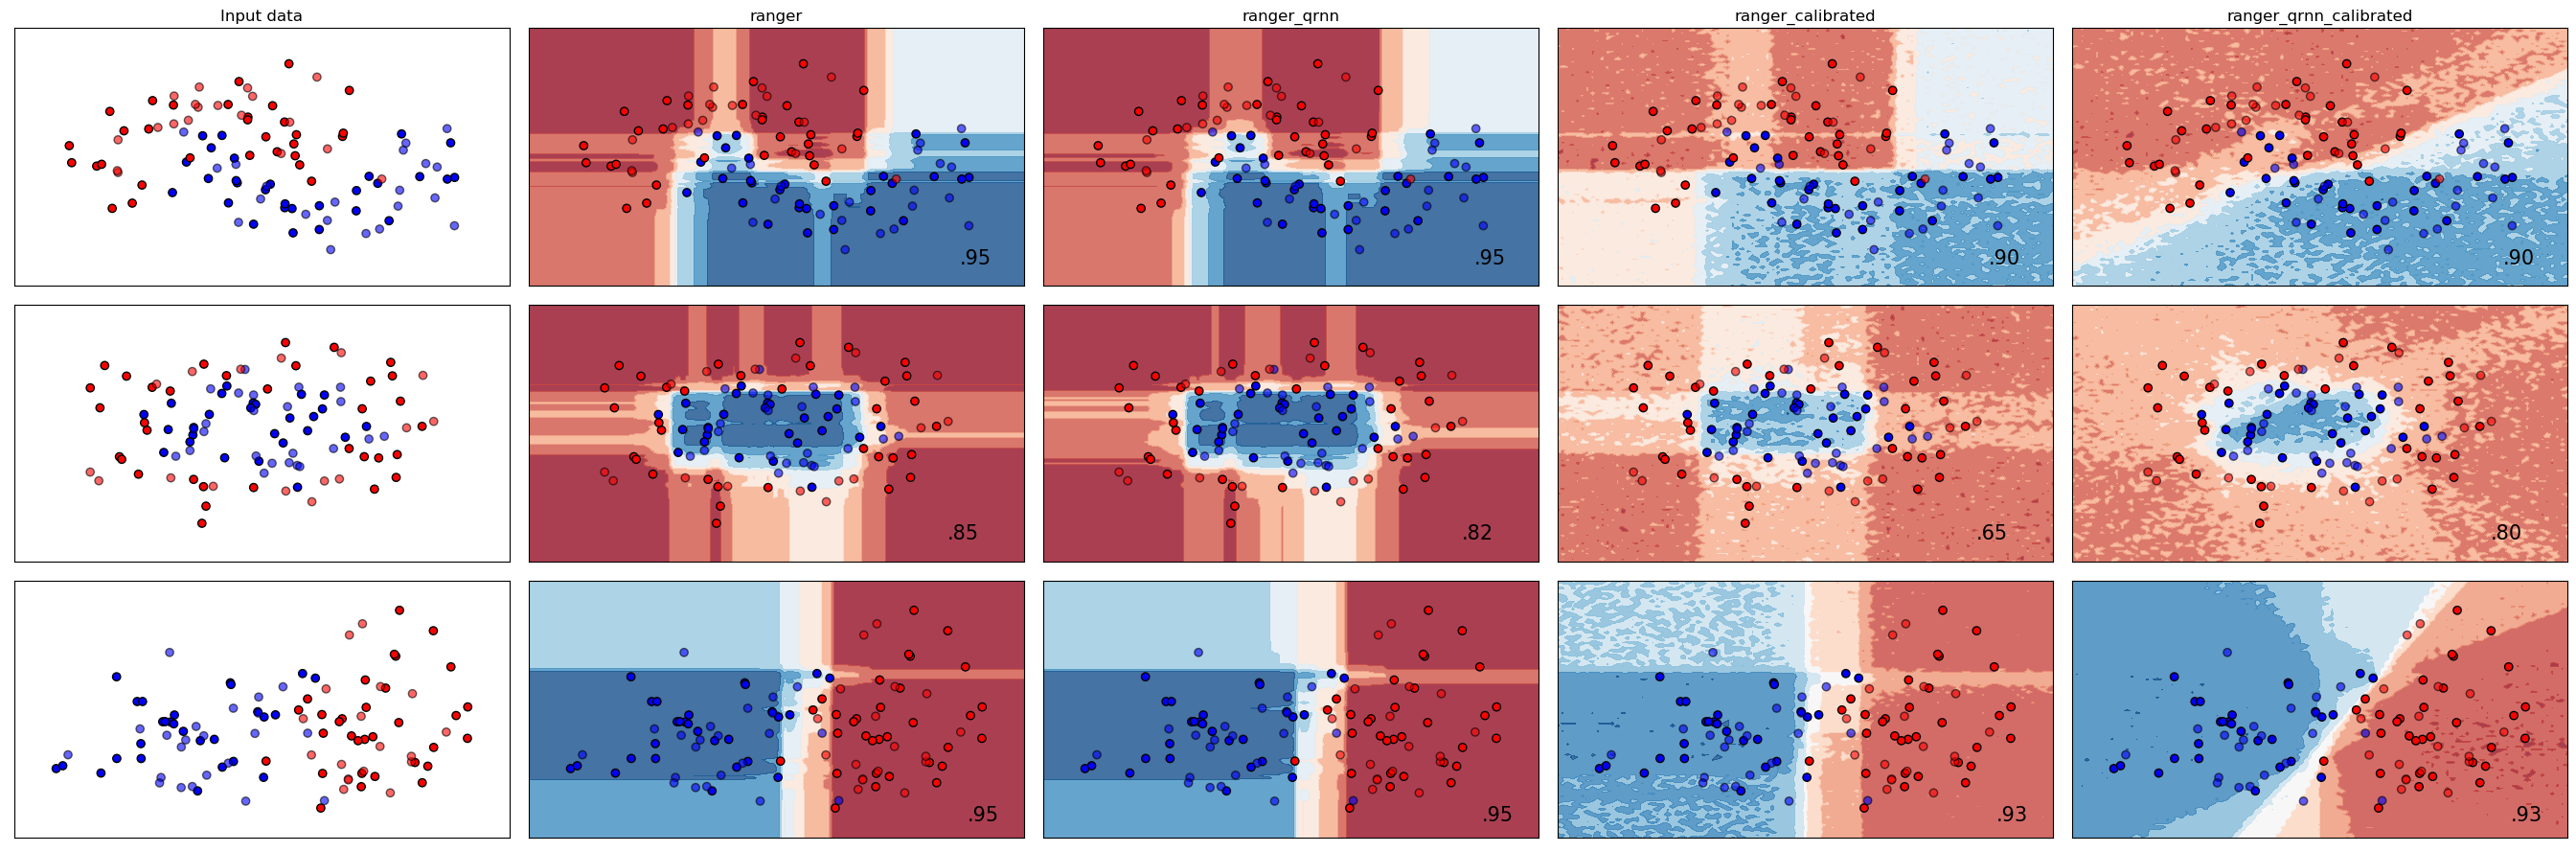

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds[0], ds[1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        try:
            score = clf.score(X_test, y_test)
        except: # no scoring method available yet for prediction sets
            score = np.mean(clf.predict_proba(X_test).argmax(axis=1) == y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()